In [ ]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


with open('./data/nyc/risk_mask.pkl', 'rb') as f:
    file = pickle.load(f)

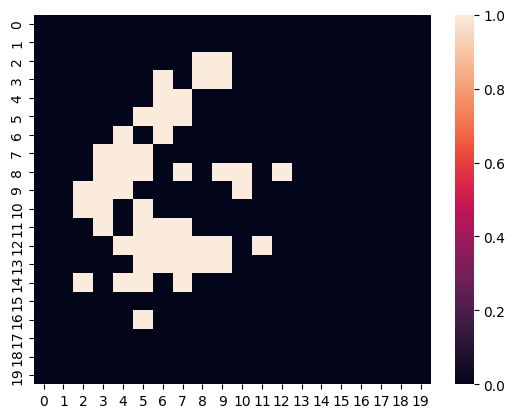

In [4]:
sns.heatmap(file)
plt.show()

In [1]:
import numpy as np
import pickle

In [2]:
# with open('./data/chicago/all_data.pkl', 'rb') as f:
with open('./data/nyc/all_data.pkl', 'rb') as f:
    file = pickle.load(f).astype(np.float32)

print(file.shape)

(8760, 48, 20, 20)


In [3]:
with open('./data/chicago/all_data.pkl', 'rb') as f:
# with open('./data/nyc/all_data.pkl', 'rb') as f:
    file2 = pickle.load(f).astype(np.float32)

print(file2.shape)

(5832, 41, 20, 20)


In [4]:
import pandas as pd
df = pd.DataFrame(file[:,0,].reshape(-1, 400))

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
file.shape

(8760, 48, 20, 20)

In [7]:
with open('./data/chicago/risk_mask.pkl', 'rb') as f:
    ffile = pickle.load(f).astype(np.float32)

In [8]:
ffile.shape

(20, 20)

In [9]:
with open('./data/chicago/risk_adj.pkl', 'rb') as f:
    fffile = pickle.load(f).astype(np.float32)

In [10]:
fffile.shape

(197, 197)

In [11]:
with open('./data/chicago/road_adj.pkl', 'rb') as f:
    ffffile = pickle.load(f).astype(np.float32)

In [12]:
ffffile.shape

(197, 197)

In [13]:
with open('./data/chicago/grid_node_map.pkl', 'rb') as f:
    fffffile = pickle.load(f).astype(np.float32)

In [14]:
fffffile.shape

(400, 197)

In [15]:
import random
import matplotlib.pyplot as plt
from PIL import Image

def minmax(data):
    data_min = data.min()
    data_max = data.max()

    norm_data = (data-data_min) / (data_max - data_min)
    norm_data = (norm_data * 255.0).astype(np.uint8)
    return norm_data

def plot_seq(data, seq_len, mode='mmnist'):
    fig, ax = plt.subplots(2, seq_len, figsize=(seq_len, 3))
    count = random.randint(0, data.shape[0]-seq_len)
    fig.suptitle(f'Dataset_{count}th', fontweight='bold', fontsize=15)

    for i in range(seq_len):
        if mode == 'mmnist':
            ax[0, i].imshow(Image.fromarray(data[i, count]), cmap='gray', aspect='auto')
            # ax[0, i].imshow(Image.fromarray(data[i, count]), aspect='auto')
        else:
            # ax[0, i].imshow(Image.fromarray(data[count+i]), cmap='gray', aspect='auto')
            ax[0, i].imshow(Image.fromarray(data[count+i]), aspect='auto')
        ax[0, i].axis('off')
    for i in range(seq_len):
        if mode == 'mmnist':
            ax[1, i].imshow(Image.fromarray(data[seq_len+i, count]), cmap='gray', aspect='auto')
            # ax[1, i].imshow(Image.fromarray(data[seq_len+i, count]), aspect='auto')
        else:
            # ax[1, i].imshow(Image.fromarray(data[count+seq_len+i]), cmap='gray', aspect='auto')
            ax[1, i].imshow(Image.fromarray(data[count+seq_len+i]), aspect='auto')
        ax[1, i].axis('off')

    ax[0, 0].set_title("Input sequence", fontsize=12, loc='left')
    ax[1, 0].set_title("Output sequence", fontsize=12, loc='left')

    plt.tight_layout()
    plt.show()

In [29]:
file[:, 33:39,].shape

(8760, 6, 20, 20)

In [21]:
file[:, 46, ].shape

(8760, 20, 20)

In [32]:
Image.fromarray(file[0, 0,])

ValueError: Could not save to PNG for display

<PIL.Image.Image image mode=F size=20x20>

In [37]:
file[:, 0, ].shape

(8760, 20, 20)

In [35]:
np.swapaxes(file[:,33:34, ], 1, -1).shape

(8760, 20, 20, 1)

In [56]:
np.max(file[:,0,])

46.0

In [19]:
file[:,0,].shape

(8760, 20, 20)

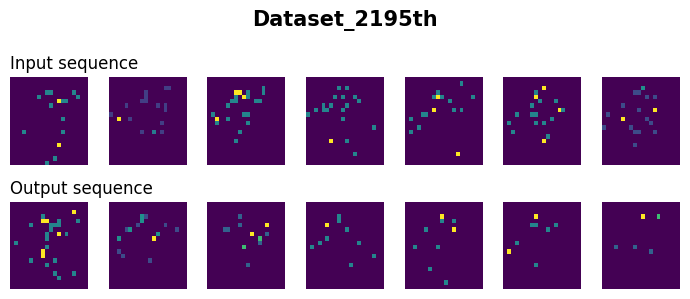

In [16]:
# bikenyc in-flow
plot_seq(minmax(np.swapaxes(file[:,0, ], 1, -1)), seq_len=7, mode='else')

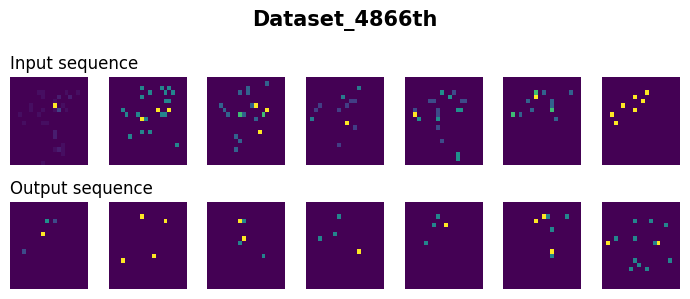

In [53]:
# bikenyc in-flow
plot_seq(minmax(np.swapaxes(file[:,0, ], 1, -1)), seq_len=7, mode='else')

In [54]:
import torch
print(torch.__version__)

2.1.2+cu118
